In [2]:
from NEU_CLS_dataloader import get_neucls_dataloader

import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [3]:
# 加载数据集
train_loader = get_neucls_dataloader(data_dir = '../data/NEU-CLS/', num_epochs = 16,
                               batch_size = 32, input_size = 200)
# batch_size = 100
# train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
all = train_loader['train']#+train_loader['val']
# 从DataLoader中获取数据
# 从DataLoader中获取所有数据
data = []
labels = []
for batch_data, batch_labels in all:
    data.append(batch_data.view(batch_data.shape[0], -1).numpy())
    labels.append(batch_labels.numpy())
data = np.concatenate(data)
labels = np.concatenate(labels)

Initializing Datasets and Dataloaders...


In [ ]:

# 对数据进行归一化
scaler = StandardScaler()
data = scaler.fit_transform(data)

# 对数据进行t-SNE降维
# tsne = TSNE(n_components=2, perplexity=6, n_iter=20000)
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(data)

# 绘制可视化图形
# sns.set_palette("bright")
sns.set_palette("Set1")
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue=labels,
    legend="full",
    alpha=0.4
)
plt.title("t-SNE Visualization of Dataset")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


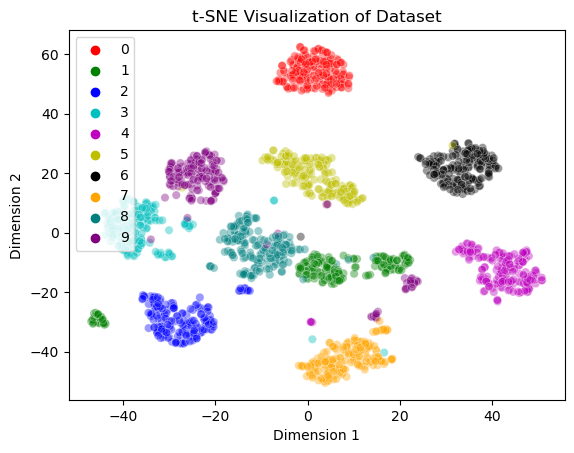

In [5]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# 数据加载
digits = load_digits()

# 提取特征和标签
X, y = digits.data, digits.target

# t-SNE降维
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# 根据标签分组
groups = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
palette = ['r', 'g', 'b', 'c', 'm', 'y', 'k', '#FFA500', '#008080', '#800080']

sns.set_palette("Set1")
# 创建seaborn图表，并设置x，y轴的标签
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette=palette,
    alpha=0.4)

# 设置图例位置
plt.legend(loc='upper left')
plt.title("t-SNE Visualization of Dataset")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()